<a href="https://colab.research.google.com/github/CharlemagneBrain/ECG_Image_Preprocessing/blob/main/Extract_Signal_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extraction des douze dérivations de l'ECG à partir de l'image délivrée de l'électrocardiographe Edan SE-1515 ⚕

### **Objectif** 🎯 : 

Dans ce carnet de notes, le but est d'extraire les signaux des électrocardiogrammes qui sont à la base extraites sous formes d'images. <br/>
**NB 🔑 :** L'image utilisée ici est un peu flou. La raison n'ayant pas d'explication car directement exporté du logiciel, aucun traitement n'a été effectué entre l'exportation et l'importation dans ce carnet de notes. *(Point à revoir)*

Les différentes étapes du prétraitement (expliqées de manière résumé dans la suite) sont ⏬ :     

1. Importation et Rognement automatique du fichier jpeg   ✂
2. Transformation de l'image en couleur en une image en noir et blanc 🔳
  - Image en Nuance de gris : De quoi s'agit-il? Pourquoi ? Techniques utilisées?
  - Image en noir et blanc : De quoi s'agit-il? Pourquoi? Technique utilisée?
3. Transformation de l'image en noir et blanc en un vecteur ✅
  - Technique utilisée : **(inspirée du Dr Mbaye)**
  - Représentation graphique des 12 dérivations 

---
Version de [Python](python.org) : 3.8.16 <br/>
Librairies utilisées : 
- [OpenCV](opencv.org/)
- [Matplotlib](https://matplotlib.org/)
- [Numpy](https://numpy.org/)


### Importation des bibliothéques

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

## 1. Importation et Rognement automatique du fichier jpeg ✂
Nous récupérons le fichier depuis un emplacement de fichier spécifié par la variable `path` et rognons de manière automatique en utilisant une indexation de tableau de NumPy sur l'image chargé.
La fonction imshow de matplotlib.pyplot est ensuite utilisée pour afficher l'image rognée.<br/> 
**Pourquoi** ❓ : Nous rognons l'image d'origine pour nous concentrer sur la partie contenant nos douzes dérivations. Les informations toutes supprimés qui sont les métadonnées du patient et certaines des ses données cliniques. Le reste sont des espaces blancs; nous réduisons alors notre champ d'étude à une zone contenant les informations qui nous intéressent.

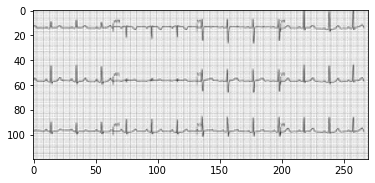

In [ ]:
# Récupération du fichier ECG
path = "/content/drive/MyDrive/normal.jpeg"
ecg = cv.imread(path)
ecg = ecg[60: 180, 30:300]

plt.imshow(ecg);

Nous pouvons observer la taille de notre image indiquant la taille de l'image en termes de nombre de lignes, de colonnes et de canaux de couleur. Dans notre cas, l'image a 120 lignes, 270 colonnes et 3 canaux de couleur. <br/>
Le nombre de lignes et de colonnes indique la taille de l'image en pixels, tandis que le nombre de canaux de couleur indique le nombre de couches de couleur utilisées pour représenter l'image. <br/>
Les images couleur ont généralement 3 canaux de couleur (rouge, vert et bleu) d'où 3 dans notre cas.

In [ ]:
ecg.shape

(120, 270, 3)

## 2. Transformation de l'image en couleur en une image en noir et blanc 🔳
### Image en Nuance de gris : De quoi s'agit-il? Pourquoi ? Technique utilisée?

On utilise la fonction `cvtColor` de `OpenCV` pour convertir l'image ecg de couleur RGB(red, green, blue pour rouge, vert, bleu en français) à une image de couleur en niveaux de gris. <br/>

La fonction `cvtColor` prend en entrée l'image d'entrée et un code de couleur indiquant comment l'image doit être convertie. Dans notre cas, le code `cv.COLOR_BGR2GRAY` indique que l'image doit être convertie en une image de couleur en niveaux de gris. <br/>

Cette fonction calcule alors **les niveaux de gris de chaque pixel** de l'image en utilisant une formule spécifique, qui tient compte des valeurs de chaque canal de couleur de l'image d'entrée. Le résultat de la conversion est une image en niveaux de gris, qui est stockée dans la variable gray. <br/>
\
  $$gris = 0.2989 \times rouge + 0.5870 \times vert + 0.1140 \times bleu$$

Dans cette formule, "rouge", "vert" et "bleu" sont les valeurs de chaque canal de couleur de l'image d'entrée, allant de 0 (noir) à 255 (blanc). Ici "gris" désigne la valeur de niveau de gris qui est calculée pour chaque pixel de l'image. <br/>

Les valeurs 0.2989, 0.5870 et 0.1140 sont appelées coefficients de pondération. Ces derniers sont généralement considérés comme les valeurs qui donnent les meilleurs résultats de conversion de couleur RGB vers niveaux de gris, car ils sont basés sur la façon dont l'œil humain perçoit naturellement les couleurs.<br/>
L'œil humain est plus sensible au vert et au rouge qu'au bleu, de sorte que la valeur verte et rouge de chaque pixel ont un poids plus élevé dans le calcul de la valeur de niveau de gris. Le bleu, qui est moins visible pour l'œil humain, a un poids moins élevé dans le calcul.<br/>
Ces coefficients de pondération ont été choisis de manière à produire des résultats de conversion de couleur qui sont proches de ceux que l'œil humain perçoit naturellement. <br/>

**Pourquoi**❓: L'objectif ici est de simplifier le traitement de l'image et pour réduire la quantité de données à traiter tout en rendant plus remarquable l'information à traiter. Dans notre contexte, le cadrillage représente du bruit c'est à dire des parties de l'image inutiles à notre études. La mise en nuance de gris de notre image est utilisée pour mettre en évidence certains détails de l'image, ici les courbes de nos dérivations qui peuvent être masqués ou moins claire par les couleurs de l'image d'origine.

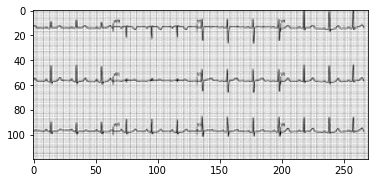

In [ ]:
gray = cv.cvtColor(ecg, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray");

### Image en noir et blanc : De quoi s'agit-il? Pourquoi? Technique utilisée?

On utilise la fonction `threshold` de `OpenCV` pour appliquer un seuil à l'image en niveaux de gris. Elle prend en entrée l'image en niveaux de gris et une valeur de seuil, et retourne une image binaire (c'est-à-dire une image avec des pixels noirs et blancs uniquement) en fonction de ce seuil. <br/>
Les pixels de l'image d'entrée qui ont une valeur supérieure ou égale au seuil sont remplacés par un pixel blanc dans l'image de sortie, tandis que les pixels ayant une valeur inférieure au seuil sont remplacés par un pixel noir. <br/>
L'argument `cv.THRESH_BINARY` indique que le seuil doit être appliqué de manière binaire, c'est-à-dire que les pixels de l'image d'entrée qui ont une valeur supérieure ou égale au seuil sont remplacés par un pixel blanc, tandis que les pixels ayant une valeur inférieure au seuil sont remplacés par un pixel noir. <br/>
En résumé : <br/>

$$\begin{cases}
pixel(x,y) = 255 \text{ si } pixel(x,y) \ge seuil \ \text{sinon }
pixel(x,y) = 0 & 
\end{cases}$$

**Pourquoi**❓: Cette étape nous sert de mettre en évidence les détails importants d'une image en masquant les détails moins importants, et également pour séparer les différentes parties de l'image en fonction de leur niveau de luminosité ou de couleur. Dans notre, elle nous sert à mettre en évidence les signaux des différntes dérivations de l'arrière plan qui initialement est constitué de bruit. Pour ce faire, nous avons transformé notre image de telle sorte que l'arrière plan soit blanc et l'avant plan en noir.




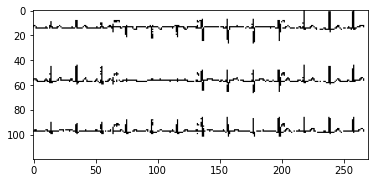

In [ ]:
ret,th=cv.threshold(gray,180,255,cv.THRESH_BINARY)
plt.imshow(th, cmap="gray");

## 3. Transformation de l'image en noir et blanc en un vecteur ✅

Tout d'abord, la fonction `get_derivations` prend en entrée l'image binaire et retourne un dictionnaire contenant différentes dérivations de notre électrocardiogramme. Le but est d'extraire les douze dérivations de l'ecg depuis l'image binanire afin de traiter chacune d'elles et d'en extraire le signal sous forme de vecteur. <br/>

Les dérivations sont stockées dans le dictionnaire en utilisant des indices de colonne pour sélectionner les colonnes de l'image de la ligne correspondante( car dans notre image, on a trois lignes composées chacune de quatre dérivations) qui correspondent à chaque dérivation. Par exemple, la dérivation "lead_1" est stockée sous la clé "lead_1" et correspond aux colonnes 0 à 60 de la première ligne.


In [ ]:
def get_derivations(image):
  
  ligne1 = image[0:35, :]
  ligne2 = image[40:80, :]
  ligne3 = image[80:120, :]

  # Initialiser le dictionnaire de dérivations
  derivations = {}

  derivations["lead_1"] = ligne1[:, 0:60]
  derivations["lead_avr"] = ligne1[:, 70: 130]
  derivations["lead_v1"] = ligne1[:, 140: 200]
  derivations["lead_v4"] = ligne1[:, 205: 260]

  derivations["lead_2"] = ligne2[:, 0:60]
  derivations["lead_avl"] = ligne2[:, 70:130]
  derivations["lead_v2"] = ligne2[:, 140:200]
  derivations["lead_v5"] = ligne2[:, 205:260]

  derivations["lead_3"] = ligne3[:, 0:60]
  derivations["lead_avf"] = ligne3[:, 70:130]
  derivations["lead_v3"] = ligne3[:, 140:200]
  derivations["lead_v6"] = ligne3[:, 205:260]

  return derivations

### Les dérivations extraites à partir de la fonction précédents sont représentées ci-dessous : 

In [ ]:
derivations = get_derivations(th)

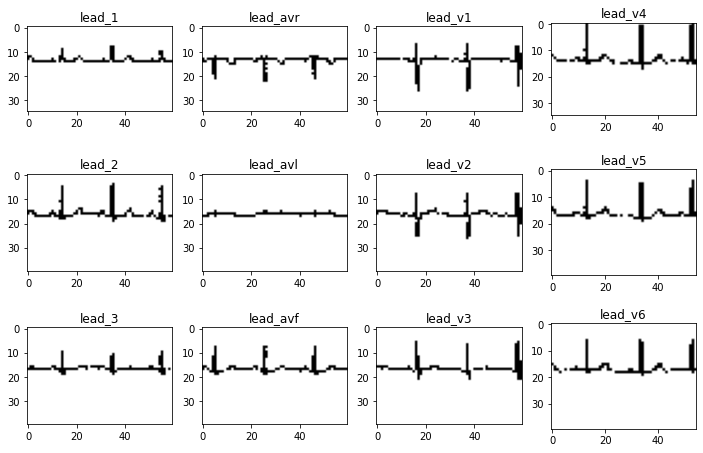

In [ ]:
# Créer un sous-plot de 3 lignes et 4 colonnes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for i, (name, derivation) in enumerate(derivations.items()):
  row = i // 4
  col = i % 4
  
  ax = axes[row][col]
  
  ax.imshow(derivation, cmap="gray")
  
  ax.set_title(name)

plt.show();

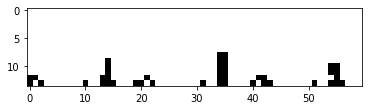

In [ ]:
# Récupérer la première dérivation à partir de l'image
first_derivation = derivations["lead_1"]

# Afficher la première dérivation
plt.imshow(first_derivation[0:14, :], cmap="gray")

# Afficher le plot
plt.show();

Dans cette fonction, l'image est d'abord divisée en deux parties, appelées lead_sup et lead_inf, qui correspondent respectivement à la partie supérieure et inférieure de l'image plus précisémment le signal de la dérivation concernée. Puis la fonction calcule la somme des valeurs de chaque colonne pour chacune des deux parties de l'image en utilisant une compréhension de liste. <br/>
 La somme des valeurs de chaque colonne pour la partie supérieure de l'image est stockée dans une liste appelée `lead_sup_sum_col`, tandis que la somme des valeurs de chaque colonne pour la partie inférieure de l'image est stockée dans une liste `lead_inf_sum_col`. Ensuite, la fonction multiplie chaque élément de la liste lead_inf_sum_col par -1 et stocke le résultat dans une nouvelle liste appelée neg_lead. Puis on utilise la fonction vstack de `NumPy` pour concaténer les listes lead_sup_sum_col et neg_lead en une seule matrice.<br/>
Enfin, la fonction calcule la somme de chaque colonne de la matrice concaténée et retourne le résultat sous forme de vecteur dans la variable `final`




In [ ]:
def get_vector(lead):

  lead_sup = lead[14:, :]
  lead_inf = lead[0:14:, :]


  lead_inf_sum_col = [ sum(x) for x in zip(*lead_inf) ]
  lead_sup_sum_col = [ sum(x) for x in zip(*lead_sup) ]

  neg_lead = [element * -1 for element in lead_inf_sum_col]
  original = np.vstack((lead_sup_sum_col, neg_lead))

  final = [ sum(x) for x in zip(*original) ]
  return final

Cette fonction ci-dessous `get_vectors` prend en entrée un dictionnaire de dérivations et retourne un dictionnaire de vecteurs qui représentent chacune des dérivations.


In [ ]:
def get_vectors(derivations):
  vectors = {}
  for name, derivation in derivations.items():
    vector = get_vector(derivation)
    vectors[name] = vector
  return vectors

In [ ]:
vectors = get_vectors(derivations)

La fonction `plot_data` prend en entrée un dictionnaire de données, un préfixe de titre, ainsi que le nombre de lignes et de colonnes de la grille de figures à afficher. Elle affiche une grille de figures avec un élément du dictionnaire dans chaque figure. <br/>

In [ ]:
def plot_data(data, title_prefix, nrows, ncols):
  
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 8))

  for i, (name, element) in enumerate(data.items()):
    
    row = i // ncols
    col = i % ncols
    ax = axes[row][col]
    
    if isinstance(element, np.ndarray):
      ax.imshow(element, cmap="gray")
    else:
      ax.plot(element)

    ax.set_title(f"{title_prefix} {name}")

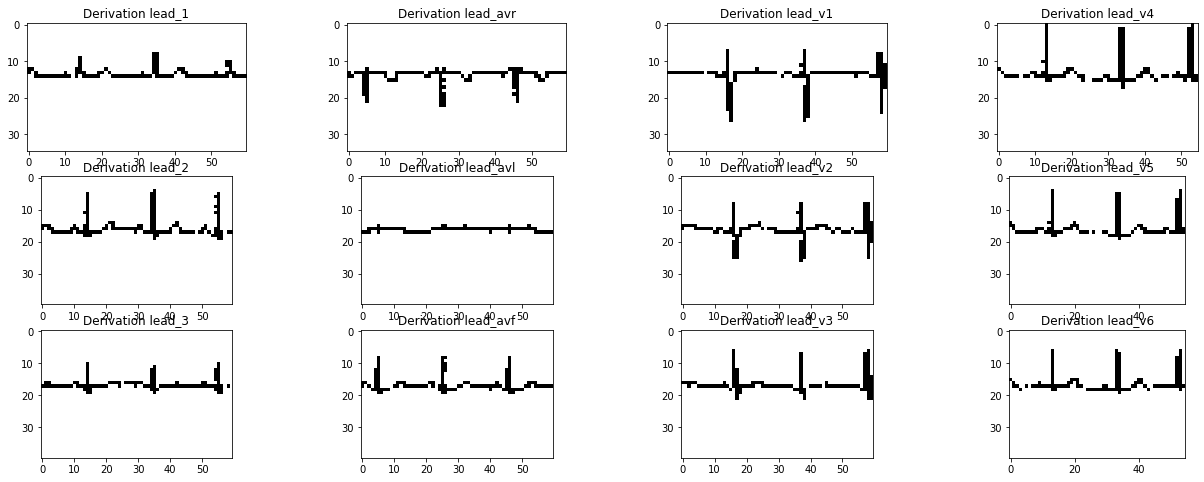

In [ ]:
plot_data(derivations, "Derivation", 3, 4);

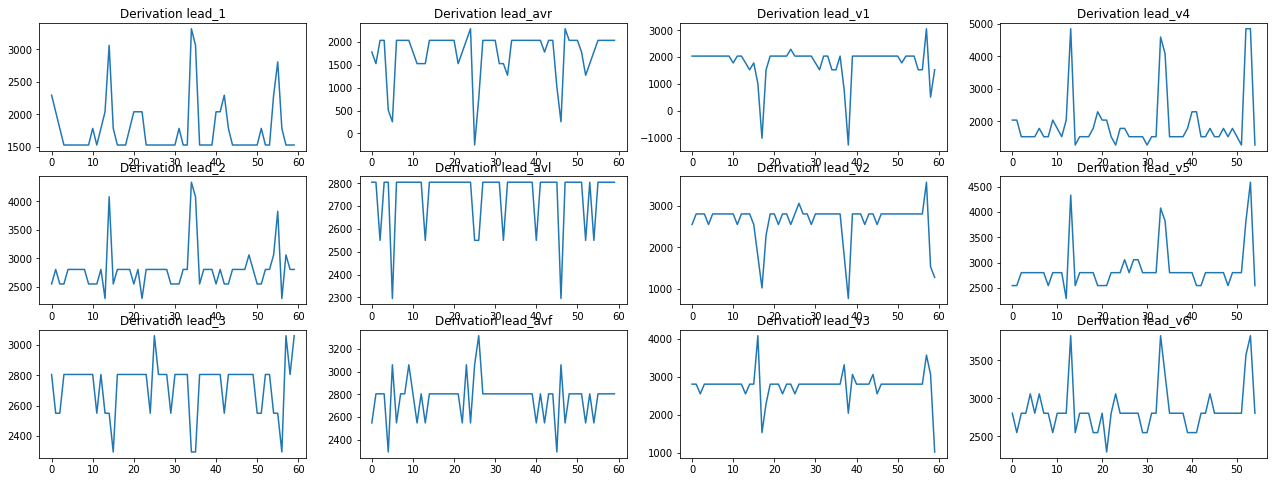

In [ ]:
plot_data(vectors, "Derivation", 3, 4);

Les résultats sont bonnes dans l'ensemble même si pour certaines dérivations la transformation laisse à désirer, car le vecteur correspondant au signal n'est pas très fidèle par exmple pour la dérivation avl et lead_3.